In [61]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [62]:
#Obtendo dados da Base central do Banco do Brasil

In [63]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [64]:
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

Text(0, 0.5, 'Inflação (%)')

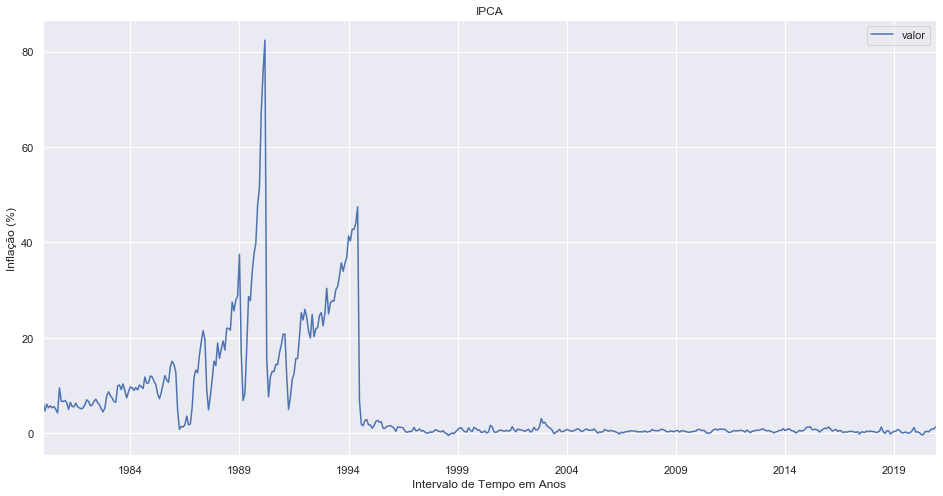

In [65]:
ipca.plot()
plt.title("IPCA")
plt.xlabel("Intervalo de Tempo em Anos")
plt.ylabel("Inflação (%)")


Text(0, 0.5, 'CDI (%)')

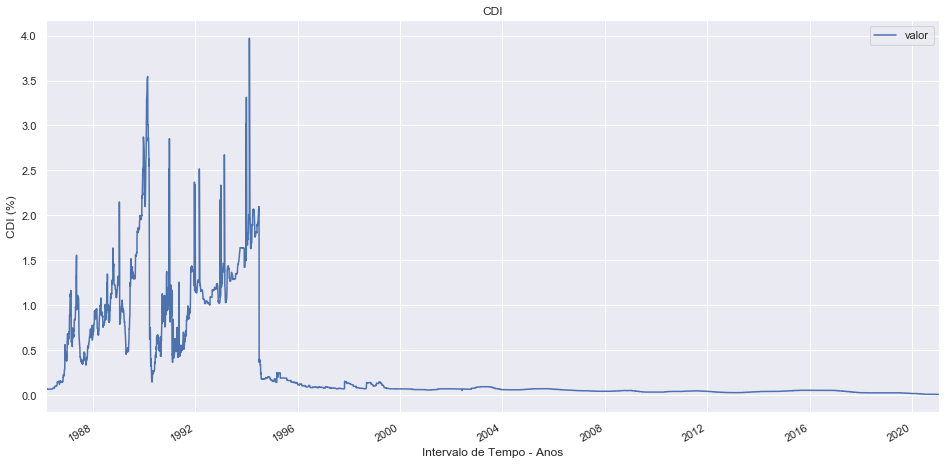

In [66]:
cdi.plot()
plt.title("CDI")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("CDI (%)")

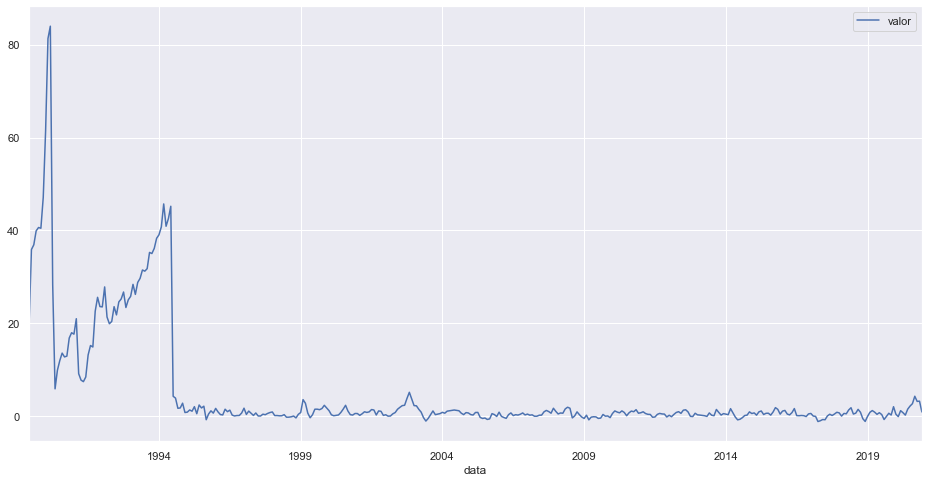

In [67]:
igpm.plot()

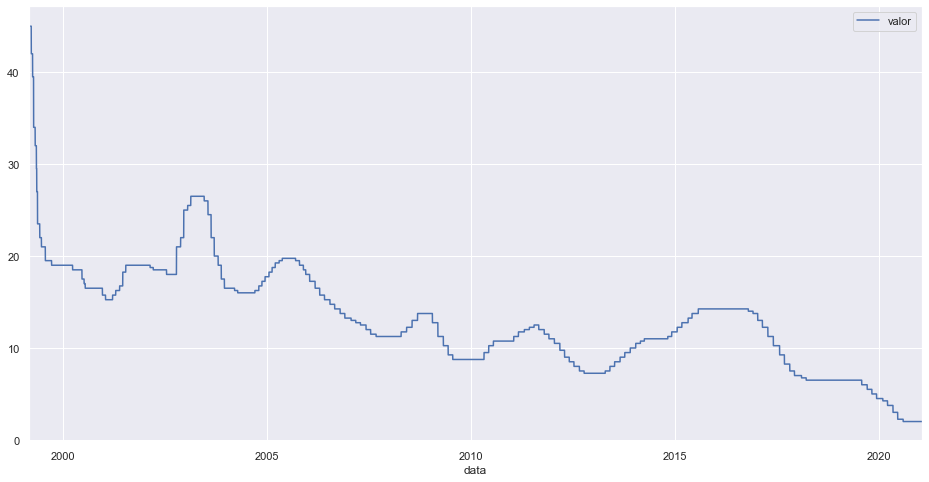

In [68]:
selic_meta.plot()

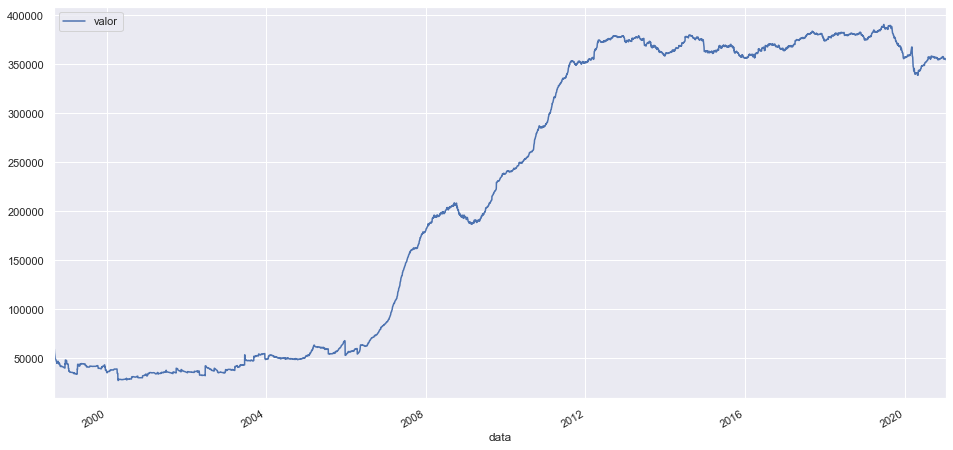

In [69]:
reservas_internacionais.plot()

In [70]:
#Pesquisa Nacional por Amostra de Domicílios - PNAD | IBGE
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-06-01,13.3
2020-07-01,13.8
2020-08-01,14.4


In [71]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [72]:
ibov_retorno = ibov.pct_change()

In [95]:
data_inicio = '1993-01-01'

In [96]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1
ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1

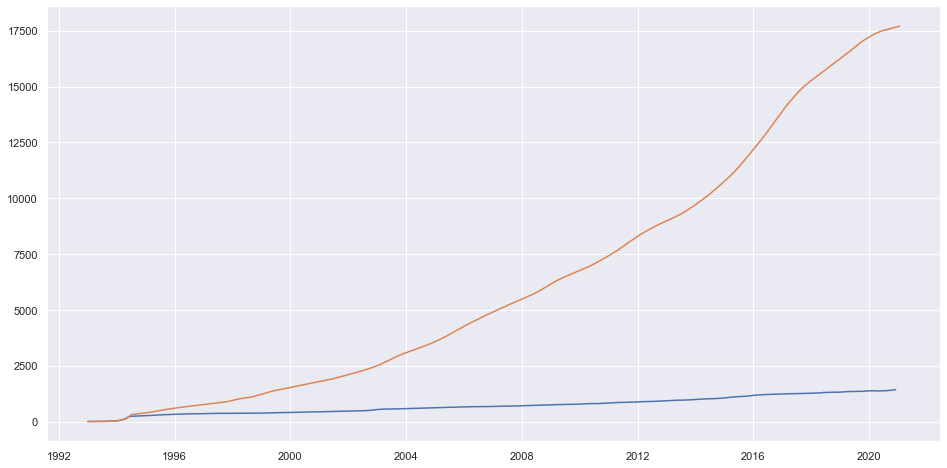

In [97]:
fig, ax = plt.subplots()
ax.plot(ipca_acumulado)
ax.plot(cdi_acumulado)

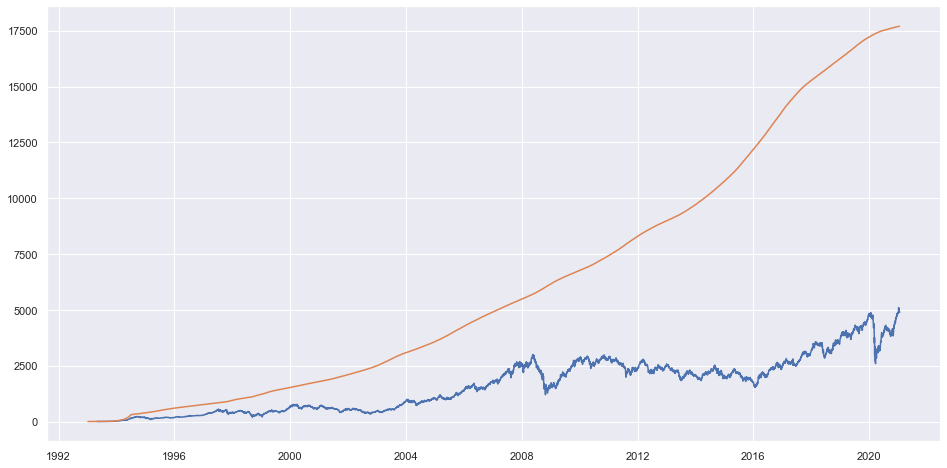

In [98]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);
